In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
pth = os.path.join('..', '..')
pth_data = os.path.join(pth, 'data')
pth_in = os.path.join(pth_data, 'cancer')
pth_mod = os.path.join(pth_data, 'features', 'biomart', 'modules')
# pth_out = os.path.join(pth, 'figures', 'cancer', 'TCGA')

In [3]:
adata = sc.read_h5ad(os.path.join(pth_in, 'TCGA.h5ad'))
adata

AnnData object with n_obs × n_vars = 10535 × 60498
    obs: '_PATIENT', 'cancer type abbreviation', 'age_at_initial_pathologic_diagnosis', 'gender', 'race', 'ajcc_pathologic_tumor_stage', 'clinical_stage', 'histological_type', 'histological_grade', 'initial_pathologic_dx_year', 'menopause_status', 'birth_days_to', 'vital_status', 'tumor_status', 'last_contact_days_to', 'death_days_to', 'cause_of_death', 'new_tumor_event_type', 'new_tumor_event_site', 'new_tumor_event_site_other', 'new_tumor_event_dx_days_to', 'treatment_outcome_first_course', 'margin_status', 'residual_tumor', 'OS', 'OS.time', 'DSS', 'DSS.time', 'DFI', 'DFI.time', 'PFI', 'PFI.time', 'Redaction'

In [4]:
mod_plt = ['Early', 'Late']
for mod in mod_plt:
    print(mod)
    fn = os.path.join(pth_mod, f'{mod.lower()}.csv')
    df_mod = pd.read_csv(fn)
    g = df_mod.hsapiens.copy()
    g = g.loc[g.isin(adata.var_names)]
    for _, df_group in adata.obs.groupby('cancer type abbreviation', observed = True):
        msk = adata.obs_names.isin(df_group.index)
        adata_group = adata[msk].copy()
        sc.tl.score_genes(adata_group,
                          gene_list = g,
                          ctrl_as_ref = False,
                          score_name = mod,
                          random_state = 1234)
        adata.obs.loc[msk, mod] = adata_group.obs[mod]

Early
Late


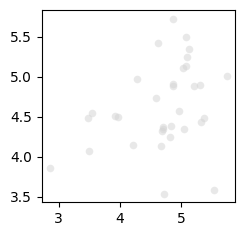

In [ ]:
# fraction early+, late+
key = 'cancer type abbreviation'
df = (adata.obs.set_index(key)[mod_plt] > 0).astype(float)
df
# df_sample = df.groupby(keys, observed = True).mean()
# df_disease = df_sample.groupby(keys[0], observed = True).mean()
# msk = (df_disease.sum(axis = 1) > .5)
# df_plt0 = df_disease.loc[~msk].copy()
# df_plt1 = df_disease.loc[msk].copy()
# df_plt2 = df_sample.loc[df_plt1.index].copy()

# # plot diseases
# s, pad, lim = 30, .05, (0, 1)
# fig, ax = plt.subplots(1, 1, figsize = (2.5, 2.5))
# ax.scatter(df_plt0.Early,
#            df_plt0.Late,
#            c = 'lightgray',
#            s = s, alpha = .5,
#            linewidth = 0)
# ax.scatter(df_plt1.Early,
#            df_plt1.Late,
#            c = 'tab:blue',
#            s = s, alpha = .9,
#            linewidth = 0)

# # plot samples
# ax2 = ax.inset_axes([.535, .46, .4, .4])
# ax2.scatter(df_plt2.Early,
#             df_plt2.Late,
#             c = 'tab:blue',
#             s = 7, alpha = .7,
#             linewidth = 0)

# # axes
# ticks = np.arange(lim[0], lim[1] + .1, .2).round(1)
# ticks2 = np.arange(lim[0], lim[1] + .1, .5).round(1)
# _items_ = zip((ax, ax2), (ticks, ticks2), (8, 5.5))
# for _ax_, _ticks_, fs in _items_:
#     _ax_.set_xlim(lim[0] - pad, lim[1] + pad)
#     _ax_.set_ylim(lim[0] - pad, lim[1] + pad) 
#     _ax_.set_xticks(_ticks_, _ticks_, size = fs)
#     _ax_.set_yticks(_ticks_, _ticks_, size = fs)

# ax2.tick_params('both', size = 0)
# ax2.tick_params('y', pad = 2)  
# title = ' &\n'.join(df_plt1.index.values)
# ax2.set_title(title, size = 5.25, pad = 4)
# ax.set_title('Curated Cancer Cell Atlas', size = 10)
# ax.set_xlabel(r'Fraction Early$^{+}$', size = 9)
# ax.set_ylabel(r'Fraction Late$^{+}$', size = 9)
# fn = os.path.join(pth_out, 'modules.pdf')
# plt.savefig(fn, bbox_inches = 'tight')